# Week 10-3 RNN을 활용한 감성 분석 - 한글

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...  
...                                                  ...  
11374                                           ['좋아요 ']  
11375                                           ['좋아요 ']  
11376                                              ['굿']  
11377                                             ['굿 ']  
11378                                           ['좋아요 ']  

[11379 rows x 6 columns]

In [2]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10599, 6)

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  sentiment  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...          0  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...          0  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...          0  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...          0  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...          0  
...                                                  ...        ...  
11374                                           ['좋아요 ']          1  
11375                                           ['좋아요 ']          1  
11376                                              ['굿']          1  
11377                                             ['굿 ']          1  
11378                                           ['좋아요 ']          1  

[10599 rows x 7 columns]

<AxesSubplot:>

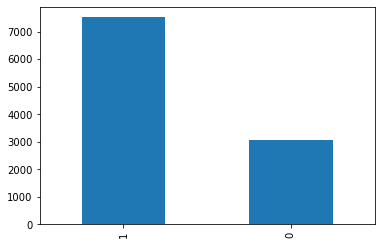

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [5]:
# 입력 변수와 출력 변수 분리
X_data = review_df['comment']
y_data = review_df['sentiment']

In [6]:
# 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)
print(sequences)

[[7230, 7231, 1421, 7232, 461, 7233, 7234, 7235, 1135, 7236, 7237, 7238, 8, 7239, 7240, 855, 7241, 211, 7242, 598, 1943, 1944, 7243, 7244, 1945, 7245, 331, 1015, 7246, 7247, 240, 599, 3073, 7248, 7249, 7250, 3074, 7251, 1135, 7252, 7253, 4277, 7254, 4278], [52, 7255, 4279, 7256, 3075, 7257, 412, 4280, 169, 2400, 18, 85, 2401, 38, 7258, 600, 85, 1246, 18, 7259, 144, 281, 101, 1946, 12, 7260, 727, 7261, 1016, 1017, 34, 52, 163, 7262, 7263, 293, 641, 10, 343, 566, 7264, 3076, 7265, 11, 7266, 2402, 1947, 4281, 601, 2, 856, 2403, 7267, 3076, 7268, 1948], [354, 31, 7269, 60, 1018, 4282, 728, 31, 3077, 642, 790, 54, 1638, 7270, 3078, 344, 145, 23, 161, 7271, 157, 23, 1019, 99, 4283, 4284, 1639, 1640, 729, 124], [1641, 7272, 2404, 730, 7273, 7274, 7275, 3079, 1422, 4285, 2405, 22, 78, 4286, 7276], [7277, 7278, 7279, 7280, 7281], [7282, 222, 1642, 535, 7283, 7284, 7285, 413, 7286, 510, 4287, 3080, 413, 7287, 7288, 4288, 82], [7289, 1949, 7290, 1950, 1643, 13, 180, 4289, 1020, 4290, 383, 7291, 7

In [7]:
# 단어-to-인덱스 확인하기
word_to_index = tokenizer.word_index
print(word_to_index)

{'좋아요': 1, '잘': 2, '너무': 3, '에어컨': 4, '연결이': 5, '굿': 6, '좋네요': 7, '다시': 8, '왜': 9, '앱': 10, '업데이트': 11, '다': 12, '수': 13, '세탁기': 14, '편해요': 15, '계속': 16, '와이파이': 17, '제품': 18, '연결': 19, '좀': 20, 'lg': 21, '더': 22, '어플': 23, '안되네요': 24, '아주': 25, '정말': 26, '건조기': 27, '좋습니다': 28, 'good': 29, '편하고': 30, '공기청정기': 31, '안됨': 32, '진짜': 33, '안되고': 34, '편리합니다': 35, '엘지': 36, '편리하고': 37, '후': 38, '안됩니다': 39, '편리해요': 40, '사용하고': 41, '갑자기': 42, '이': 43, '앱이': 44, '있습니다': 45, '앱을': 46, '있어요': 47, '있어서': 48, '기능이': 49, '안': 50, '편리하네요': 51, '그냥': 52, '사용하기': 53, '좋음': 54, '자꾸': 55, '기능': 56, '어떻게': 57, '편하네요': 58, '할': 59, '사용': 60, '하고': 61, '이거': 62, '스타일러': 63, '다른': 64, '있는': 65, '알림이': 66, '제대로': 67, '집에': 68, '쓰고': 69, '냉장고': 70, '그리고': 71, '있는데': 72, '역시': 73, '스마트': 74, '참': 75, '무슨': 76, '또': 77, '많이': 78, '바로': 79, 'ㅡㅡ': 80, '안되요': 81, '해주세요': 82, '아예': 83, '있어': 84, '전원': 85, 'tv': 86, '앱으로': 87, '원격으로': 88, '하면': 89, '해도': 90, '연결도': 91, '등록이': 92, '전원을': 93, '넘': 94, '이렇게': 95, '완전': 96

In [8]:
# 단어 빈도수 확인
tokenizer.word_counts.items()

odict_items([('추가정보등록은', 1), ('앱설정에서', 1), ('충분히', 7), ('할수있음에도', 1), ('굳이', 22), ('기기화면마다', 1), ('상단배치하여', 1), ('끈질기게', 1), ('개인정보를', 9), ('요구하는점', 1), ('추가정보등록을', 1), ('일회거부시', 1), ('다시', 405), ('묻지않는', 1), ('구버전을', 1), ('사용하면', 12), ('앱실행시마다', 1), ('업데이트를', 45), ('강요하는', 1), ('개발자', 17), ('팝업이', 5), ('지속적으로', 5), ('뜨는점', 1), ('스마트씽스나', 1), ('미홈', 5), ('투야', 1), ('등', 30), ('어느', 10), ('유사앱들에서도', 1), ('전례가', 1), ('없는', 40), ('개인정보', 17), ('요구에', 3), ('정부', 1), ('유관부서에', 1), ('문의예정이다', 1), ('소비자를', 3), ('기망하여', 1), ('이용한', 1), ('마케팅질을', 1), ('당장', 2), ('중단하길', 1), ('바란다', 2), ('그냥', 134), ('엘지제품은', 1), ('리모컨만', 2), ('사용하는것이', 1), ('정신', 3), ('건강에', 1), ('좋을', 24), ('듯합니다', 2), ('앱에서', 53), ('제품삭제하고', 4), ('제품', 255), ('전원', 90), ('차단', 4), ('후', 156), ('1분', 1), ('후에', 17), ('켜서', 8), ('재등록하니', 1), ('기존', 59), ('추가', 35), ('등록', 80), ('정보도', 5), ('다', 362), ('지워진상태입니다', 1), ('이제는', 14), ('알려준대로', 1), ('재', 10), ('설치해도', 10), ('안되고', 174), ('리모컨', 54), ('쓰는것이', 1), ('답일것', 1), ('같네요', 

In [9]:
# 한 번 출현한 단어 비율 확인하기
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 21471
단어 집합(vocabulary)에서 희귀 단어의 비율: 74.81184668989546
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 25.392038600723765


In [10]:
# 단어 사이즈 확인
vocab_size = len(word_to_index) + 1  # 패딩을 위한 토큰인 0번 고려
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 28701


텍스트의 최대 길이 : 86
텍스트의 최소 길이 : 0
텍스트의 평균 길이 : 7.977922


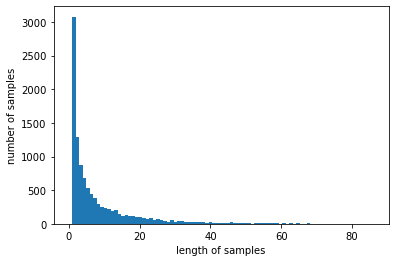

In [11]:
# 텍스트 길이 분포 보기
X_data = sequences
print('텍스트의 최대 길이 : %d' % max(len(l) for l in X_data))
print('텍스트의 최소 길이 : %d' % min(len(l) for l in X_data))
print('텍스트의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=87)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
# 패딩과 훈련 데이터, 테스트 데이터 나누기
max_len = 86
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=12)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))

훈련 데이터의 크기(shape):  (10599, 86)
train data set size = 7419,  test data set size = 3180


In [13]:
# SimpleRNN 모델 만들기
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
93/93 [==============================] - 2s 14ms/step - loss: 0.4945 - acc: 0.7545 - val_loss: 0.3596 - val_acc: 0.8410
Epoch 2/4
93/93 [==============================] - 1s 12ms/step - loss: 0.2719 - acc: 0.8910 - val_loss: 0.2691 - val_acc: 0.8861
Epoch 3/4
93/93 [==============================] - 1s 12ms/step - loss: 0.2102 - acc: 0.9176 - val_loss: 0.2605 - val_acc: 0.8922
Epoch 4/4
93/93 [==============================] - 1s 12ms/step - loss: 0.1119 - acc: 0.9621 - val_loss: 0.2594 - val_acc: 0.8861


100/100 [==============================] - 0s 3ms/step - loss: 0.2620 - acc: 0.8821

 테스트 정확도: 0.8821


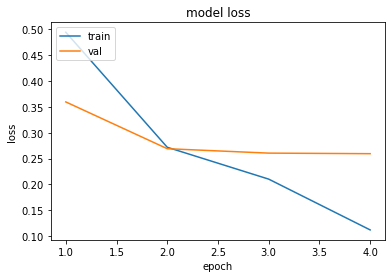

In [14]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

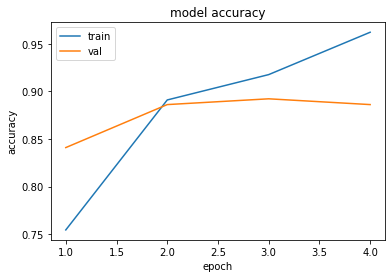

In [15]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
# LSTM 모델 만들기
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
93/93 [==============================] - 4s 23ms/step - loss: 0.4646 - acc: 0.7692 - val_loss: 0.3632 - val_acc: 0.8464
Epoch 2/10
93/93 [==============================] - 2s 21ms/step - loss: 0.2872 - acc: 0.8802 - val_loss: 0.2476 - val_acc: 0.8922
Epoch 3/10
93/93 [==============================] - 2s 21ms/step - loss: 0.1714 - acc: 0.9343 - val_loss: 0.2143 - val_acc: 0.9070
Epoch 4/10
93/93 [==============================] - 2s 21ms/step - loss: 0.1163 - acc: 0.9567 - val_loss: 0.2156 - val_acc: 0.9117
Epoch 5/10
93/93 [==============================] - 2s 21ms/step - loss: 0.0868 - acc: 0.9695 - val_loss: 0.2157 - val_acc: 0.9097
Epoch 6/10
93/93 [==============================] - 2s 21ms/step - loss: 0.0561 - acc: 0.9799 - val_loss: 0.2347 - val_acc: 0.9117
Epoch 7/10
93/93 [==============================] - 2s 22ms/step - loss: 0.0402 - acc: 0.9864 - val_loss: 0.2482 - val_acc: 0.9104
Epoch 8/10
93/93 [==============================] - 2s 21ms/step - loss: 0.0294 - a

100/100 [==============================] - 1s 5ms/step - loss: 0.3326 - acc: 0.9069

 테스트 정확도: 0.9069


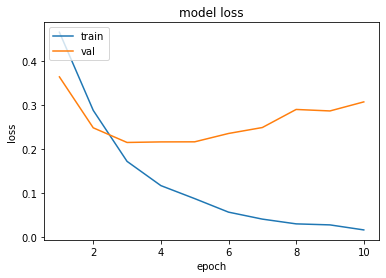

In [17]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

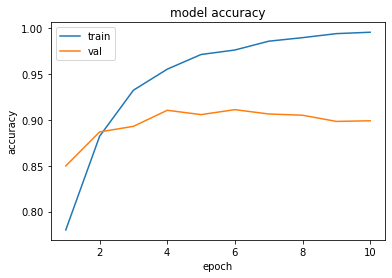

In [18]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()